In [3]:
import torch

t = torch.rand(size=(64*64, 64*64))
torch.linalg.det(t)

tensor(-inf)

In [37]:
n_samples = 200
n_features = 10
data = torch.rand(size=(n_samples, n_features))
data = data.reshape(n_samples//n_features, n_features, *data.shape[1:])
data.shape

torch.Size([20, 10, 10])

In [38]:
def determinant(i):
    return torch.linalg.det(data[i])

In [39]:
example = 3
print(f'Определитель {example}го кусочка - {determinant(example)}')

Определитель 3го кусочка - 0.005750196985900402


In [40]:
print(f'все определители: {determinant(torch.arange(len(data)))}')

все определители: tensor([-0.0275, -0.0043, -0.0958,  0.0058, -0.0010,  0.0960,  0.0028, -0.0985,
        -0.0014, -0.0082,  0.0108, -0.0047,  0.0006, -0.0146,  0.0027, -0.0717,
        -0.0022, -0.1426,  0.0011,  0.0102])


In [41]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

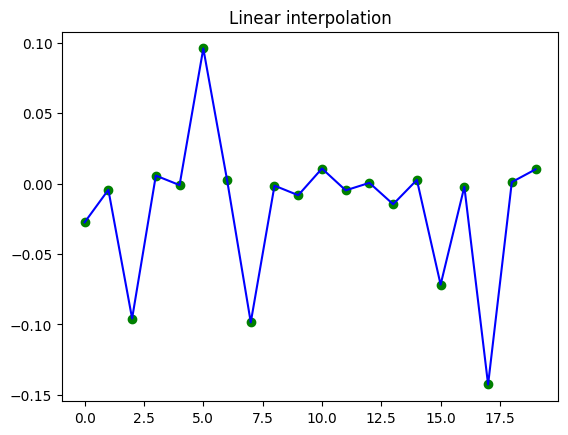

In [49]:
# line interpolation
times = torch.arange(len(data))
values = determinant(times)
f = interp1d(times, values, kind='linear', fill_value='extrapolate')

plt.plot(times, values, 'og')
plt.plot(f(times), 'b')
plt.title('Linear interpolation')
plt.show()

In [50]:
from scipy.integrate import quad

quad(f, 0, len(data))

/tmp/ipykernel_3077/2081108601.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(f, 0, len(data))


(-0.3192339322424265, 0.0006763779711237983)